# Clean up

Lo que se pretende es aplicar los conceptos vistos de "Análisis Exploratorio" para limpiar los distintos set de datos proporcionados.

Archivos en: https://www.kaggle.com/benhamner/sf-bay-area-bike-share

Los archivos disponibles son 4:
    * station.csv (8 KB)
    * weather.csv (428 KB)
    * trip.csv    (77 M)
    * status.csv  (1,9 GB)

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.float_format', lambda x: '%.2f' % x)

## Station.csv

In [2]:
station = pd.read_csv('station.csv', sep=',', parse_dates=['installation_date'],
                      infer_datetime_format=True,low_memory=False)

### Types

In [3]:
station.dtypes

id                            int64
name                         object
lat                         float64
long                        float64
dock_count                    int64
city                         object
installation_date    datetime64[ns]
dtype: object

### Null values

In [4]:
station.isnull().any()

id                   False
name                 False
lat                  False
long                 False
dock_count           False
city                 False
installation_date    False
dtype: bool

### Size

In [5]:
station.shape

(70, 7)

### Sample

In [6]:
station.head()

,id,name,lat,long,dock_count,city,installation_date
0,2,San Jose Diridon Caltrain Station,37.33,-121.90,27,San Jose,2013-08-06
1,3,San Jose Civic Center,37.33,-121.89,15,San Jose,2013-08-05
2,4,Santa Clara at Almaden,37.33,-121.89,11,San Jose,2013-08-06
3,5,Adobe on Almaden,37.33,-121.89,19,San Jose,2013-08-05
4,6,San Pedro Square,37.34,-121.89,15,San Jose,2013-08-07


## Weather.csv

In [21]:
weather = pd.read_csv('weather.csv', sep=',', parse_dates=['date'],
                      infer_datetime_format=True,low_memory=False)

### Types

In [22]:
weather.dtypes

date                              datetime64[ns]
max_temperature_f                        float64
mean_temperature_f                       float64
min_temperature_f                        float64
max_dew_point_f                          float64
mean_dew_point_f                         float64
min_dew_point_f                          float64
max_humidity                             float64
mean_humidity                            float64
min_humidity                             float64
max_sea_level_pressure_inches            float64
mean_sea_level_pressure_inches           float64
min_sea_level_pressure_inches            float64
max_visibility_miles                     float64
mean_visibility_miles                    float64
min_visibility_miles                     float64
max_wind_Speed_mph                       float64
mean_wind_speed_mph                      float64
max_gust_speed_mph                       float64
precipitation_inches                      object
cloud_cover         

In [23]:
weather['precipitation_inches'].unique()

array(['0', '0.23', 'T', '0.01', '0.28', '0.63', '0.29', '0.06', '0.85',
       '0.09', '0.64', '0.42', '0.35', '0.43', '0.22', '0.74', '0.03',
       '0.12', '0.16', '0.49', '0.17', '0.08', '0.04', '0.53', '0.07',
       '0.02', '0.83', '1.06', '1.71', '0.37', '0.27', '0.45', '0.78',
       '0.88', '0.66', '0.47', '0.1', '0.61', '0.14', '0.05', '0.68',
       '0.97', '0.26', '0.15', '0.87', '0.57', '0.69', '0.32', '0.21',
       '0.24', '0.52', '0.36', '0.33', '0.25', '0.11', '0.2', '1.18',
       '1.43', '3.12', '0.48', '0.19', '1.09', '0.65', '0.13', '0.91',
       '0.99', '0.18', '0.4', '1.07', nan, '0.41', '0.34', '1.25', '1.85',
       '3.36', '0.71', '1.3', '0.72', '0.6', '0.51', '1.2', '1.28', '3.23',
       '0.55', '1.26', '0.39'], dtype=object)

Llamativamente, "T", es un dato válido, por "trace", significa que se detectó lluvia, pero no la suficiente para poder ser medida.

[Fuente 1](http://help.wunderground.com/knowledgebase/articles/656875-what-does-t-stand-for-on-the-rain-precipitation)

Aquí, [Fuente 2](http://www.experts123.com/q/what-does-the-t-mean-in-the-precipitation-column-of-the-data-listing.html) indica que la precipitación debe ser menor a 0,01 pulgadas

En principio, opino que deberíamos mantener ese valor 'T', ya veremos si nos resulta de utilidad

In [24]:
weather[weather['precipitation_inches'] == 'T']['events'].unique()

array(['Fog', 'Rain', nan, 'Fog-Rain', 'Rain-Thunderstorm'], dtype=object)

Efectivamente, los eventos muestran que fueron días de lluvia, o al menos de humedad debido a la presencia de niebla.

In [25]:
weather['min_dew_point_f'] = pd.to_numeric(weather['min_dew_point_f'], errors='coerce')

In [26]:
weather['events'].unique()

array([nan, 'Fog', 'Rain', 'Fog-Rain', 'rain', 'Rain-Thunderstorm'], dtype=object)

In [27]:
# Uniformizando

weather['events'] = weather['events'].apply(lambda x: 'Rain' if x == 'rain' else x)

### Null values

In [28]:
weather.isnull().any()

date                              False
max_temperature_f                  True
mean_temperature_f                 True
min_temperature_f                  True
max_dew_point_f                    True
mean_dew_point_f                   True
min_dew_point_f                    True
max_humidity                       True
mean_humidity                      True
min_humidity                       True
max_sea_level_pressure_inches      True
mean_sea_level_pressure_inches     True
min_sea_level_pressure_inches      True
max_visibility_miles               True
mean_visibility_miles              True
min_visibility_miles               True
max_wind_Speed_mph                 True
mean_wind_speed_mph                True
max_gust_speed_mph                 True
precipitation_inches               True
cloud_cover                        True
events                             True
wind_dir_degrees                   True
zip_code                          False
dtype: bool

### Size

In [29]:
weather.shape

(3665, 24)

### Sample

In [16]:
weather.head()

,date,max_temperature_f,mean_temperature_f,min_temperature_f,max_dew_point_f,mean_dew_point_f,min_dew_point_f,max_humidity,mean_humidity,min_humidity,...,mean_visibility_miles,min_visibility_miles,max_wind_Speed_mph,mean_wind_speed_mph,max_gust_speed_mph,precipitation_inches,cloud_cover,events,wind_dir_degrees,zip_code
0,2013-08-29,74.00,68.00,61.00,61.00,58.00,56.00,93.00,75.00,57.00,...,10.00,10.00,23.00,11.00,28.00,0,4.00,NaN,286.00,94107
1,2013-08-30,78.00,69.00,60.00,61.00,58.00,56.00,90.00,70.00,50.00,...,10.00,7.00,29.00,13.00,35.00,0,2.00,NaN,291.00,94107
2,2013-08-31,71.00,64.00,57.00,57.00,56.00,54.00,93.00,75.00,57.00,...,10.00,10.00,26.00,15.00,31.00,0,4.00,NaN,284.00,94107
3,2013-09-01,74.00,66.00,58.00,60.00,56.00,53.00,87.00,68.00,49.00,...,10.00,10.00,25.00,13.00,29.00,0,4.00,NaN,284.00,94107
4,2013-09-02,75.00,69.00,62.00,61.00,60.00,58.00,93.00,77.00,61.00,...,10.00,6.00,23.00,12.00,30.00,0,6.00,NaN,277.00,94107


### Output

In [34]:
weather.to_csv(path_or_buf='weather_clean.csv', sep=',',index_label=False)

In [36]:
clean_weather = pd.read_csv('weather_clean.csv')
clean_weather.head()

,date,max_temperature_f,mean_temperature_f,min_temperature_f,max_dew_point_f,mean_dew_point_f,min_dew_point_f,max_humidity,mean_humidity,min_humidity,...,mean_visibility_miles,min_visibility_miles,max_wind_Speed_mph,mean_wind_speed_mph,max_gust_speed_mph,precipitation_inches,cloud_cover,events,wind_dir_degrees,zip_code
0,2013-08-29,74.00,68.00,61.00,61.00,58.00,56.00,93.00,75.00,57.00,...,10.00,10.00,23.00,11.00,28.00,0,4.00,NaN,286.00,94107
1,2013-08-30,78.00,69.00,60.00,61.00,58.00,56.00,90.00,70.00,50.00,...,10.00,7.00,29.00,13.00,35.00,0,2.00,NaN,291.00,94107
2,2013-08-31,71.00,64.00,57.00,57.00,56.00,54.00,93.00,75.00,57.00,...,10.00,10.00,26.00,15.00,31.00,0,4.00,NaN,284.00,94107
3,2013-09-01,74.00,66.00,58.00,60.00,56.00,53.00,87.00,68.00,49.00,...,10.00,10.00,25.00,13.00,29.00,0,4.00,NaN,284.00,94107
4,2013-09-02,75.00,69.00,62.00,61.00,60.00,58.00,93.00,77.00,61.00,...,10.00,6.00,23.00,12.00,30.00,0,6.00,NaN,277.00,94107


## Trip.csv

In [72]:
import time

start = time.time()
trips = pd.read_csv('trip.csv', sep=',', parse_dates=['start_date','end_date'],
                      infer_datetime_format=True,low_memory=False)
print 'Time elapsed: ' + str(time.time() - start)

Time elapsed: 11.6980831623


In [67]:
trips.dtypes

id                             int64
duration                       int64
start_date            datetime64[ns]
start_station_name            object
start_station_id               int64
end_date              datetime64[ns]
end_station_name              object
end_station_id                 int64
bike_id                        int64
subscription_type             object
zip_code                     float64
dtype: object

### Null values

In [6]:
trips.isnull().any()

id                    False
duration              False
start_date            False
start_station_name    False
start_station_id      False
end_date              False
end_station_name      False
end_station_id        False
bike_id               False
subscription_type     False
zip_code               True
dtype: bool

### Outliers

In [68]:
zipcode = list(set(trips.zip_code.unique()))
zipcode = sorted(zipcode)

for i in zipcode:
    print i,

nan 0.0 1.0 2.0 3.0 4.0 6.0 7.0 8.0 9.0 11.0 12.0 13.0 19.0 22.0 25.0 27.0 31.0 32.0 33.0 34.0 35.0 36.0 39.0 40.0 41.0 43.0 44.0 45.0 46.0 47.0 48.0 49.0 51.0 52.0 53.0 54.0 55.0 56.0 57.0 58.0 60.0 61.0 62.0 64.0 65.0 66.0 67.0 74.0 80.0 81.0 82.0 84.0 86.0 88.0 90.0 91.0 92.0 94.0 99.0 100.0 105.0 123.0 147.0 148.0 149.0 155.0 165.0 166.0 172.0 175.0 179.0 180.0 182.0 194.0 200.0 218.0 234.0 250.0 263.0 292.0 300.0 302.0 303.0 306.0 310.0 321.0 343.0 351.0 353.0 354.0 358.0 360.0 371.0 372.0 373.0 380.0 385.0 386.0 403.0 405.0 408.0 412.0 415.0 426.0 430.0 434.0 455.0 457.0 466.0 489.0 492.0 505.0 506.0 507.0 510.0 514.0 517.0 521.0 553.0 555.0 556.0 562.0 570.0 571.0 577.0 580.0 591.0 598.0 600.0 603.0 604.0 607.0 610.0 612.0 614.0 617.0 626.0 638.0 646.0 650.0 652.0 664.0 670.0 674.0 676.0 682.0 687.0 702.0 725.0 742.0 748.0 758.0 776.0 780.0 818.0 829.0 852.0 854.0 886.0 888.0 894.0 907.0 917.0 926.0 940.0 949.0 960.0 966.0 971.0 972.0 979.0 981.0 987.0 994.0 999.0 1000.0 1001.0 

Los zip codes parecen cualquier ser cualquier cosa, deberían estar entre [estos valores](http://www.city-data.com/zipmaps/San-Francisco-California.html). De todos modos, a priori no me parece un dato que nos vaya a resultar útil. Tampoco sé si habla de zip de la estación inicial o final, en Kaggle no encontré información al respecto.

In [8]:
trips.sort_values(by='duration',ascending=False).head()

,id,duration,start_date,start_station_name,start_station_id,end_date,end_station_name,end_station_id,bike_id,subscription_type,zip_code
573566,568474,17270400,2014-12-06 21:59:00,South Van Ness at Market,66,2015-06-24 20:18:00,2nd at Folsom,62,535,Customer,95531
382718,825850,2137000,2015-06-28 21:50:00,Market at Sansome,77,2015-07-23 15:27:00,Yerba Buena Center of the Arts (3rd @ Howard),68,466,Customer,97213
440339,750192,1852590,2015-05-02 06:17:00,San Antonio Shopping Center,31,2015-05-23 16:53:00,Castro Street and El Camino Real,32,680,Subscriber,94024
371066,841176,1133540,2015-07-10 10:35:00,University and Emerson,35,2015-07-23 13:27:00,University and Emerson,35,262,Customer,94306
80510,111309,722236,2013-11-30 13:29:00,University and Emerson,35,2013-12-08 22:06:00,University and Emerson,35,247,Customer,94301


Hay valores bastante "bizarros" de duracion de viaje, ¿del 6/12/2014 al 24/06/2015 en bici? Fuerte...

In [10]:
trips.sort_values(by='duration').head()

,id,duration,start_date,start_station_name,start_station_id,end_date,end_station_name,end_station_id,bike_id,subscription_type,zip_code
301480,218776,60,2014-03-18 17:50:00,Mechanics Plaza (Market at Battery),75,2014-03-18 17:51:00,Mechanics Plaza (Market at Battery),75,334,Subscriber,94104
252114,284638,60,2014-05-14 20:11:00,Market at 10th,67,2014-05-14 20:12:00,Market at 10th,67,372,Subscriber,94107
79739,110247,60,2013-11-28 09:52:00,2nd at Townsend,61,2013-11-28 09:53:00,2nd at Townsend,61,546,Subscriber,94107
618094,506025,60,2014-10-20 08:16:00,Market at Sansome,77,2014-10-20 08:17:00,Market at Sansome,77,109,Subscriber,94114
547555,603851,60,2015-01-14 12:37:00,Golden Gate at Polk,59,2015-01-14 12:38:00,Golden Gate at Polk,59,548,Subscriber,94109


Esta gente parece que saca la bici un minuto y se arrepiente...
start_station_name == end_station_name, ¿lo consideramos un viaje? No me parece...

In [20]:
same_destination = trips[trips['start_station_name'] == trips['end_station_name']]
same_destination = same_destination[same_destination['duration'] > 120]
same_destination = same_destination[same_destination['duration'] < 3600]
same_destination.sort_values(by='duration',ascending=True)

,id,duration,start_date,start_station_name,start_station_id,end_date,end_station_name,end_station_id,bike_id,subscription_type,zip_code
602677,526831,121,2014-11-03 11:46:00,Mezes Park,83,2014-11-03 11:48:00,Mezes Park,83,78,Subscriber,94063
595160,537618,121,2014-11-10 10:19:00,Castro Street and El Camino Real,32,2014-11-10 10:21:00,Castro Street and El Camino Real,32,654,Customer,95054
144921,431764,121,2014-08-30 09:40:00,Harry Bridges Plaza (Ferry Building),50,2014-08-30 09:42:00,Harry Bridges Plaza (Ferry Building),50,567,Subscriber,94133
241424,299073,121,2014-05-27 08:50:00,San Francisco Caltrain 2 (330 Townsend),69,2014-05-27 08:52:00,San Francisco Caltrain 2 (330 Townsend),69,541,Subscriber,94041
415315,783574,121,2015-05-27 20:56:00,Clay at Battery,41,2015-05-27 20:58:00,Clay at Battery,41,478,Customer,95648
15768,25798,121,2013-09-18 10:47:00,Beale at Market,56,2013-09-18 10:49:00,Beale at Market,56,530,Subscriber,94111
182398,379667,121,2014-07-25 08:47:00,Washington at Kearny,46,2014-07-25 08:49:00,Washington at Kearny,46,347,Customer,63104
46628,66415,121,2013-10-21 11:32:00,Temporary Transbay Terminal (Howard at Beale),55,2013-10-21 11:34:00,Temporary Transbay Terminal (Howard at Beale),55,633,Customer,NaN
329515,895603,121,2015-08-18 18:42:00,Market at 4th,76,2015-08-18 18:44:00,Market at 4th,76,363,Subscriber,94702
94069,130417,121,2013-12-18 22:54:00,University and Emerson,35,2013-12-18 22:56:00,University and Emerson,35,121,Subscriber,94133


In [23]:
viajes_sin_destino = trips[trips['start_station_name'] == trips['end_station_name']].shape[0]

print str(viajes_sin_destino) + " \"viajes\""

23981 "viajes"


In [24]:
# Describe de la duracion de los viajes con outliers

trips.duration.describe()

count     669959.00
mean        1107.95
std        22255.44
min           60.00
25%          344.00
50%          517.00
75%          755.00
max     17270400.00
Name: duration, dtype: float64

In [74]:
# Limpiando datos. Veamos como queda tras sacar los viajes entre estaciones iguales

clean_trips = trips
clean_trips = clean_trips[clean_trips['duration'] <= 86400 ]
clean_trips = clean_trips[clean_trips['duration'] > 120 ]
clean_trips.duration.describe()

count   664154.00
mean       994.70
std       3273.11
min        121.00
25%        348.00
50%        520.00
75%        758.00
max      86381.00
Name: duration, dtype: float64

In [85]:
clean_trips.to_csv(path_or_buf='trips_clean.csv',sep=',',index_label=False)

Todavía tenemos viajes "largos". Realizando un histograma para ver como se distribuyen las duraciones

In [76]:
clean_trips.sort_values(by='duration', ascending=False).head()

,id,duration,start_date,start_station_name,start_station_id,end_date,end_station_name,end_station_id,bike_id,subscription_type,zip_code
654326,454392,86381,2014-09-15 19:27:00,San Antonio Caltrain Station,29,2014-09-16 19:27:00,San Antonio Shopping Center,31,671,Customer,94040
119735,165883,86363,2014-01-25 15:45:00,Evelyn Park and Ride,30,2014-01-26 15:44:00,Evelyn Park and Ride,30,63,Customer,95035
240786,299961,86345,2014-05-27 18:00:00,Harry Bridges Plaza (Ferry Building),50,2014-05-28 17:59:00,Market at 4th,76,630,Customer,94107
541429,612819,86202,2015-01-21 14:21:00,San Mateo County Center,23,2015-01-22 14:18:00,San Mateo County Center,23,244,Customer,94063
298562,222629,86143,2014-03-21 10:59:00,Market at 4th,76,2014-03-22 10:55:00,Market at 4th,76,330,Customer,92028


In [69]:
trips[trips['duration'] < 3600].shape[0]

648712

In [83]:
sarasa.sort_values(by='duration',ascending=False)

,id,duration,start_date,start_station_name,start_station_id,end_date,end_station_name,end_station_id,bike_id,subscription_type,zip_code
220016,327693,3599,2014-06-17 12:05:00,Golden Gate at Polk,59,2014-06-17 13:05:00,Harry Bridges Plaza (Ferry Building),50,496,Subscriber,94070
427089,767948,3599,2015-05-15 01:04:00,Market at Sansome,77,2015-05-15 02:04:00,Mechanics Plaza (Market at Battery),75,560,Subscriber,94107
188572,370867,3599,2014-07-19 11:35:00,Mountain View City Hall,27,2014-07-19 12:35:00,Mountain View Caltrain Station,28,87,Customer,94087
376967,833626,3599,2015-07-05 13:23:00,Washington at Kearny,46,2015-07-05 14:23:00,Washington at Kearny,46,413,Customer,95148
626813,493956,3599,2014-10-11 13:49:00,University and Emerson,35,2014-10-11 14:49:00,Palo Alto Caltrain Station,34,123,Customer,94109
436426,755452,3599,2015-05-06 10:46:00,Powell Street BART,39,2015-05-06 11:46:00,Embarcadero at Sansome,60,470,Customer,nil
286332,239281,3598,2014-04-07 16:04:00,Embarcadero at Sansome,60,2014-04-07 17:04:00,Powell Street BART,39,463,Customer,8550
71375,99082,3598,2013-11-17 13:00:00,Harry Bridges Plaza (Ferry Building),50,2013-11-17 14:00:00,San Francisco Caltrain (Townsend at 4th),70,328,Customer,94132
382998,825483,3597,2015-06-28 12:46:00,Rengstorff Avenue / California Street,33,2015-06-28 13:46:00,Castro Street and El Camino Real,32,683,Customer,94040
418229,779722,3597,2015-05-24 15:41:00,Embarcadero at Bryant,54,2015-05-24 16:41:00,Embarcadero at Folsom,51,601,Customer,91384


<IPython.core.display.Javascript object>


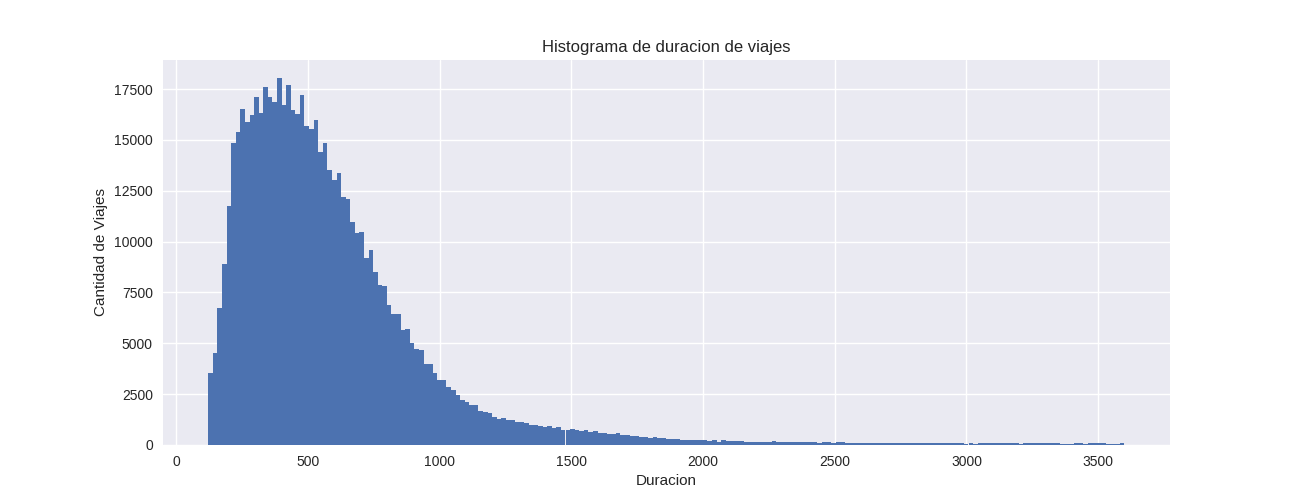

In [84]:
%matplotlib notebook
plt.figure(figsize=(13,5))
plt.hist(sarasa.duration, bins=200)
plt.xlabel("Duracion")
plt.ylabel("Cantidad de Viajes")
plt.title("Histograma de duracion de viajes")
plt.show()

In [71]:
sarasa.duration.describe()

count   648712.00
mean       598.12
std        414.16
min         60.00
25%        339.00
50%        505.00
75%        725.00
max       3599.00
Name: duration, dtype: float64

<IPython.core.display.Javascript object>


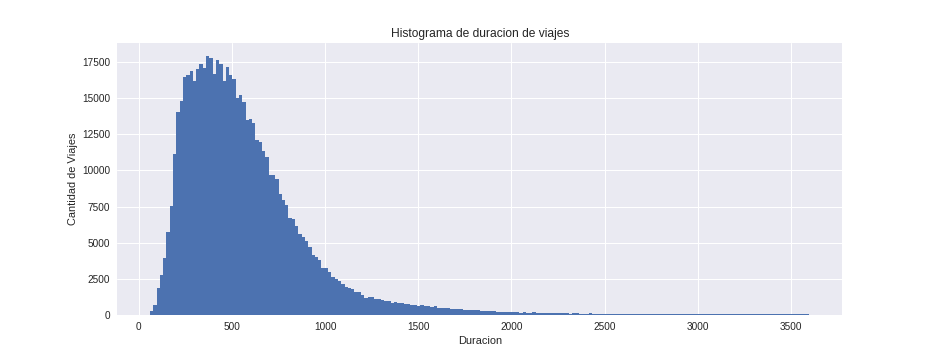

In [30]:
%matplotlib notebook

plt.figure(figsize=(13,5))
plt.hist(clean_trips.duration, bins=200)
plt.xlabel("Duracion")
plt.ylabel("Cantidad de Viajes")
plt.title("Histograma de duracion de viajes")
plt.show()

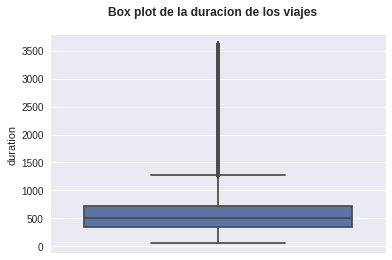

In [36]:
%matplotlib inline
import seaborn as sns

plt.subplots()[0].suptitle('Box plot de la duracion de los viajes', fontweight='bold')

sns.boxplot(x=clean_trips.duration, orient='v')

In [37]:
clean_trips.duration.describe()

count   633847.00
mean       584.50
std        383.51
min         60.00
25%        339.00
50%        502.00
75%        715.00
max       3599.00
Name: duration, dtype: float64

### Size

In [38]:
trips.shape

(669959, 11)

### Sample

In [39]:
trips.head()

,id,duration,start_date,start_station_name,start_station_id,end_date,end_station_name,end_station_id,bike_id,subscription_type,zip_code
0,4576,63,2013-08-29 14:13:00,South Van Ness at Market,66,2013-08-29 14:14:00,South Van Ness at Market,66,520,Subscriber,94127
1,4607,70,2013-08-29 14:42:00,San Jose City Hall,10,2013-08-29 14:43:00,San Jose City Hall,10,661,Subscriber,95138
2,4130,71,2013-08-29 10:16:00,Mountain View City Hall,27,2013-08-29 10:17:00,Mountain View City Hall,27,48,Subscriber,97214
3,4251,77,2013-08-29 11:29:00,San Jose City Hall,10,2013-08-29 11:30:00,San Jose City Hall,10,26,Subscriber,95060
4,4299,83,2013-08-29 12:02:00,South Van Ness at Market,66,2013-08-29 12:04:00,Market at 10th,67,319,Subscriber,94103


## Status.csv

In [ ]:
# status = pd.read_csv('status.csv', sep=',', parse_dates=['time'], iterator=True, chunksize=1000,
#                       infer_datetime_format=True,low_memory=False)

### Types

In [ ]:
status.dtypes

### Null values

In [ ]:
status.isnull().any()

### Size

In [ ]:
status.shape

### Sample

In [ ]:
status.head()